### **"Spam Detector: Classifying Messages as Spam or Ham Using Machine Learning"**

### Load Dataset

In [1]:
import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv('spam_ham_dataset[1].csv')

### First few rows of dataset

In [3]:
df.head()

,Unnamed: 0,label,text,label_num
0,605,ham,Subject: enron methanol ; meter # : 988291\r\n...,0
1,2349,ham,"Subject: hpl nom for january 9 , 2001\r\n( see...",0
2,3624,ham,"Subject: neon retreat\r\nho ho ho , we ' re ar...",0
3,4685,spam,"Subject: photoshop , windows , office . cheap ...",1
4,2030,ham,Subject: re : indian springs\r\nthis deal is t...,0


In [18]:
df.tail()

,Unnamed: 0,label,text,label_num
5166,1518,ham,Subject: put the 10 on the ft\r\nthe transport...,0
5167,404,ham,Subject: 3 / 4 / 2000 and following noms\r\nhp...,0
5168,2933,ham,Subject: calpine daily gas nomination\r\n>\r\n...,0
5169,1409,ham,Subject: industrial worksheets for august 2000...,0
5170,4807,spam,Subject: important online banking alert\r\ndea...,1


In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5171 entries, 0 to 5170
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  5171 non-null   int64 
 1   label       5171 non-null   object
 2   text        5171 non-null   object
 3   label_num   5171 non-null   int64 
dtypes: int64(2), object(2)
memory usage: 161.7+ KB


In [20]:
df.isnull().sum()

Unnamed: 0    0
label         0
text          0
label_num     0
dtype: int64

In [21]:
df.describe()

,Unnamed: 0,label_num
count,5171.000000,5171.000000
mean,2585.000000,0.289886
std,1492.883452,0.453753
min,0.000000,0.000000
25%,1292.500000,0.000000
50%,2585.000000,0.000000
75%,3877.500000,1.000000
max,5170.000000,1.000000


### **Visualization**

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns

C:\Users\Yuvraj Bhavsar\AppData\Local\Temp\ipykernel_16560\3068154494.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=spam_word_freq, x="Count", y="Word", palette="Reds_r")
C:\Users\Yuvraj Bhavsar\AppData\Local\Temp\ipykernel_16560\3068154494.py:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=ham_word_freq, x="Count", y="Word", palette="Greens_r")


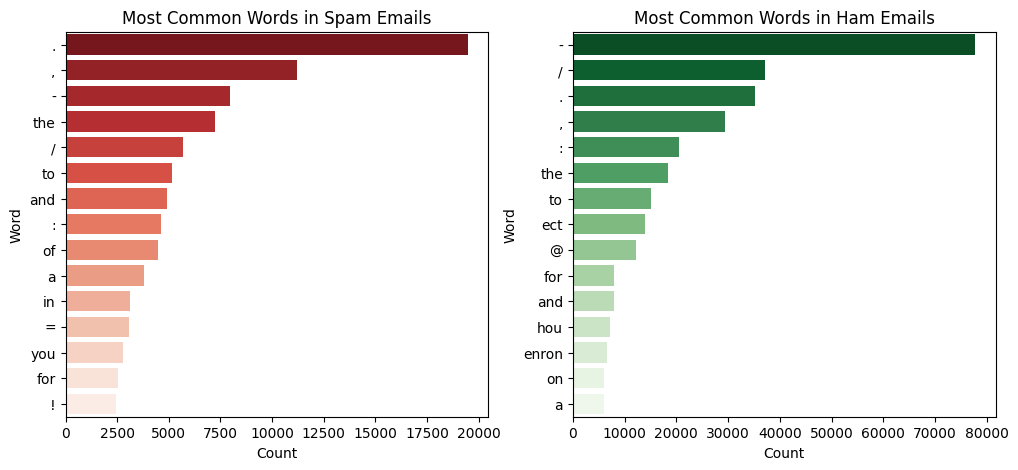

In [5]:
from collections import Counter
import pandas as pd

# Tokenize words
spam_words = " ".join(df[df['label'] == 'spam']['text']).split()
ham_words = " ".join(df[df['label'] == 'ham']['text']).split()

# Count word occurrences
spam_word_freq = pd.DataFrame(Counter(spam_words).most_common(15), columns=['Word', 'Count'])
ham_word_freq = pd.DataFrame(Counter(ham_words).most_common(15), columns=['Word', 'Count'])

# Plot
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
sns.barplot(data=spam_word_freq, x="Count", y="Word", palette="Reds_r")
plt.title("Most Common Words in Spam Emails")

plt.subplot(1, 2, 2)
sns.barplot(data=ham_word_freq, x="Count", y="Word", palette="Greens_r")
plt.title("Most Common Words in Ham Emails")

plt.show()


C:\Users\Yuvraj Bhavsar\AppData\Local\Temp\ipykernel_16560\3370811388.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='label', data=df, palette='magma')


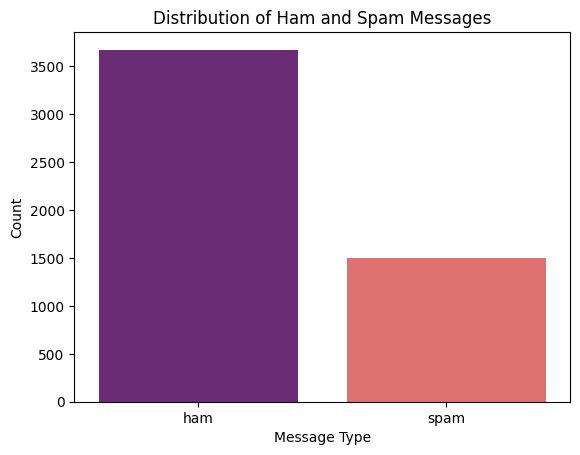

In [23]:
sns.countplot(x='label', data=df, palette='magma')
plt.title('Distribution of Ham and Spam Messages')
plt.xlabel('Message Type')
plt.ylabel('Count')
plt.show()

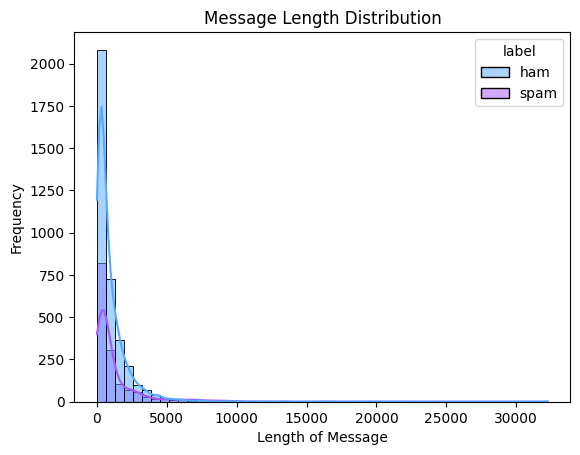

In [32]:
df['message_length'] = df['text'].apply(len)
sns.histplot(data=df, x='message_length', hue='label', bins=50, kde=True, palette='cool')
plt.title('Message Length Distribution')
plt.xlabel('Length of Message')
plt.ylabel('Frequency')
plt.show()

## 🔍🔍 TF-IDF (Term Frequency-Inverse Document Frequency)

In [6]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [7]:
vectorizer = TfidfVectorizer() 

In [8]:
X_tfidf = vectorizer.fit_transform(df['text'])

In [9]:
X_tfidf

<Compressed Sparse Row sparse matrix of dtype 'float64'
	with 456145 stored elements and shape (5171, 50447)>

## **Model**

In [10]:
from sklearn.model_selection import train_test_split

X = X_tfidf  # Use the vectorized text (TF-IDF, CountVectorizer, etc.)
y = df['label_num']  # 0 for ham, 1 for spam

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [11]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression()
model.fit(X_train, y_train)

LogisticRegression()

In [12]:
from sklearn.metrics import accuracy_score, classification_report

y_pred = model.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))


Accuracy: 0.9826086956521739
Classification Report:
               precision    recall  f1-score   support

           0       0.99      0.98      0.99       742
           1       0.96      0.98      0.97       293

    accuracy                           0.98      1035
   macro avg       0.98      0.98      0.98      1035
weighted avg       0.98      0.98      0.98      1035



In [13]:
y_pred

array([0, 1, 0, ..., 1, 0, 0])

In [14]:
y_test

1566    0
1988    1
1235    0
2868    0
4903    0
       ..
1175    1
4476    0
4198    1
2689    0
2142    0
Name: label_num, Length: 1035, dtype: int64

## **confusion_matrix**

<Figure size 600x600 with 0 Axes>

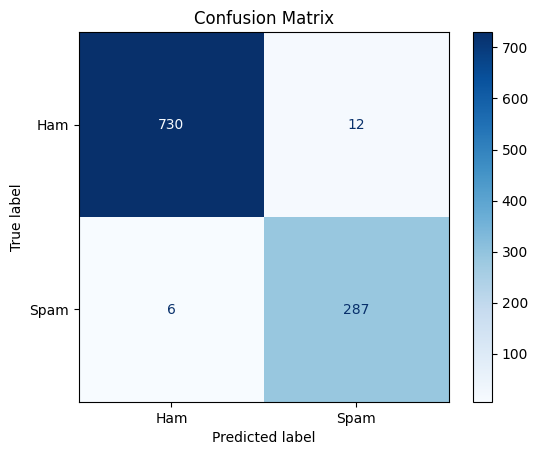

In [15]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Predictions
y_pred = model.predict(X_test)

# Compute confusion matrix
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Ham', 'Spam'])

# Plot
plt.figure(figsize=(6, 6))
disp.plot(cmap='Blues', values_format='d')
plt.title("Confusion Matrix")
plt.show()


## **Check model using new email**

In [16]:
def predict_email(text):
    # Transform text using the same vectorizer
    text_vectorized = vectorizer.transform([text])
    
    # Predict spam (1) or ham (0)
    prediction = model.predict(text_vectorized)[0]
    
    # Show result
    return "Spam" if prediction == 1 else "Ham"


In [17]:
new_email = "Get cheap watches and discount medicines now!"
result = predict_email(new_email)
print("Prediction:", result)


Prediction: Spam
